# Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import pickle

In [2]:
#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# File Import

In [3]:
file_path = (r"D:\Others\University\Degree\6th Semester\Project\Dataset_2\true_car_listings.csv")

In [4]:
read_data = pd.read_csv(file_path)
read_data

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


# Sampling Data

In [5]:
#Doing Sampling on the Data and taking only 40% of the rows
sampled_data = read_data.sample(frac=0.4, random_state=0)
#Resetting index to new index
sampled_data.reset_index(drop=True, inplace=True)
# Show the sampled data
sampled_data

,Price,Year,Mileage,City,State,Vin,Make,Model
0,35986,2017,5770,Kansas City,KS,3TMCZ5ANXHM048348,Toyota,Tacoma4WD
1,21250,2011,48475,Dania Beach,FL,WBADX1C56BE569447,BMW,3
2,9995,2010,88970,Decatur,IL,JN8AS5MV2AW142550,Nissan,RogueAWD
3,30698,2014,42885,Aurora,CO,1C4RJFCT6EC213442,Jeep,Grand
4,13265,2016,28379,Clearwater,FL,3FA6P0H77GR233896,Ford,FusionSE
...,...,...,...,...,...,...,...,...
340844,19987,2014,108470,Spring,TX,1C4RJEBG8EC185576,Jeep,Grand
340845,8499,2004,67895,Doylestown,PA,1GYDE63AX40117384,Cadillac,SRX4dr
340846,12000,2013,80230,Aurora,IL,1C4NJRFB3DD119174,Jeep,PatriotLatitude
340847,13651,2014,32433,Vienna,VA,1VWBT7A39EC112574,Volkswagen,Passat4dr


# EDA

In [6]:
sampled_data.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,35986,2017,5770,Kansas City,KS,3TMCZ5ANXHM048348,Toyota,Tacoma4WD
1,21250,2011,48475,Dania Beach,FL,WBADX1C56BE569447,BMW,3
2,9995,2010,88970,Decatur,IL,JN8AS5MV2AW142550,Nissan,RogueAWD
3,30698,2014,42885,Aurora,CO,1C4RJFCT6EC213442,Jeep,Grand
4,13265,2016,28379,Clearwater,FL,3FA6P0H77GR233896,Ford,FusionSE


In [7]:
sampled_data.tail()

,Price,Year,Mileage,City,State,Vin,Make,Model
340844,19987,2014,108470,Spring,TX,1C4RJEBG8EC185576,Jeep,Grand
340845,8499,2004,67895,Doylestown,PA,1GYDE63AX40117384,Cadillac,SRX4dr
340846,12000,2013,80230,Aurora,IL,1C4NJRFB3DD119174,Jeep,PatriotLatitude
340847,13651,2014,32433,Vienna,VA,1VWBT7A39EC112574,Volkswagen,Passat4dr
340848,20991,2013,99021,Jacksonville,FL,2T2ZK1BA5DC092341,Lexus,RX


In [8]:
sampled_data.shape

(340849, 8)

In [9]:
#Checking for missing values
sampled_data.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [10]:
#Checking for duplicate values
sampled_data.duplicated().sum()

4

In [11]:
data_types_series = sampled_data.dtypes
print(data_types_series)

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object


In [12]:
sampled_data.select_dtypes(include="number")

,Price,Year,Mileage
0,35986,2017,5770
1,21250,2011,48475
2,9995,2010,88970
3,30698,2014,42885
4,13265,2016,28379
...,...,...,...
340844,19987,2014,108470
340845,8499,2004,67895
340846,12000,2013,80230
340847,13651,2014,32433


In [13]:
sampled_data.select_dtypes(include="object")

,City,State,Vin,Make,Model
0,Kansas City,KS,3TMCZ5ANXHM048348,Toyota,Tacoma4WD
1,Dania Beach,FL,WBADX1C56BE569447,BMW,3
2,Decatur,IL,JN8AS5MV2AW142550,Nissan,RogueAWD
3,Aurora,CO,1C4RJFCT6EC213442,Jeep,Grand
4,Clearwater,FL,3FA6P0H77GR233896,Ford,FusionSE
...,...,...,...,...,...
340844,Spring,TX,1C4RJEBG8EC185576,Jeep,Grand
340845,Doylestown,PA,1GYDE63AX40117384,Cadillac,SRX4dr
340846,Aurora,IL,1C4NJRFB3DD119174,Jeep,PatriotLatitude
340847,Vienna,VA,1VWBT7A39EC112574,Volkswagen,Passat4dr


In [14]:
sampled_data.nunique()

Price       35652
Year           22
Mileage    121683
City         2550
State          59
Vin        340843
Make           57
Model        2453
dtype: int64

In [15]:
sampled_data['Price'].unique()

array([ 35986,  21250,   9995, ...,  42090,   7205, 399999], dtype=int64)

In [16]:
sampled_data['Year'].unique()

array([2017, 2011, 2010, 2014, 2016, 2009, 2015, 2013, 2007, 2008, 2006,
       2012, 2005, 2004, 2018, 2003, 2002, 2001, 1999, 2000, 1998, 1997],
      dtype=int64)

In [17]:
sampled_data['Mileage'].unique()

array([  5770,  48475,  88970, ..., 123152,  74725, 202974], dtype=int64)

In [18]:
sampled_data['City'].unique()

array(['Kansas City', 'Dania Beach', 'Decatur', ..., 'Aiken', 'Holbrook',
       'Royston'], dtype=object)

In [19]:
sampled_data['State'].unique()

array([' KS', ' FL', ' IL', ' CO', ' MA', ' CA', ' NY', ' TX', ' IN',
       ' KY', ' TN', ' PA', ' AZ', ' MD', ' HI', ' VA', ' MI', ' LA',
       ' GA', ' MO', ' NC', ' AL', ' WI', ' NJ', ' MN', ' RI', ' WA',
       ' CT', ' UT', ' IA', ' SC', ' NH', ' ID', ' OK', ' OR', ' OH',
       ' AR', ' NE', ' WV', ' NV', ' DE', ' MT', ' MS', ' ME', ' AK',
       ' NM', ' Ga', ' SD', ' WY', ' VT', ' Va', ' ND', ' Fl', ' Az',
       ' Md', ' ga', ' Oh', ' Ca', ' DC'], dtype=object)

In [20]:
sampled_data['Vin'].unique()

array(['3TMCZ5ANXHM048348', 'WBADX1C56BE569447', 'JN8AS5MV2AW142550', ...,
       '1C4NJRFB3DD119174', '1VWBT7A39EC112574', '2T2ZK1BA5DC092341'],
      dtype=object)

In [21]:
sampled_data['Make'].unique()

array(['Toyota', 'BMW', 'Nissan', 'Jeep', 'Ford', 'Ram', 'Kia',
       'Chevrolet', 'Volkswagen', 'Lincoln', 'Acura', 'Mitsubishi',
       'Cadillac', 'Hyundai', 'Mercedes-Benz', 'Buick', 'Chrysler',
       'Land', 'Subaru', 'Dodge', 'FIAT', 'Honda', 'GMC', 'Lexus',
       'INFINITI', 'Scion', 'Volvo', 'Jaguar', 'Mazda', 'Porsche', 'Audi',
       'Maserati', 'Pontiac', 'MINI', 'Suzuki', 'Saturn', 'smart',
       'HUMMER', 'Oldsmobile', 'Mercury', 'Bentley', 'Tesla', 'Genesis',
       'Rolls-Royce', 'Lamborghini', 'Ferrari', 'Saab', 'Plymouth',
       'McLaren', 'Isuzu', 'Aston', 'Alfa', 'Lotus', 'Fisker', 'Maybach',
       'AM', 'Freightliner'], dtype=object)

In [22]:
sampled_data['Model'].unique()

array(['Tacoma4WD', '3', 'RogueAWD', ..., '300C', 'IntegraRS',
       'TrailBlazerLS'], dtype=object)

In [23]:
sampled_data.sort_values(by="Price",ascending=False).head(15)

,Price,Year,Mileage,City,State,Vin,Make,Model
154711,469991,2016,312,Saint James,NY,ZHWUR1ZD5GLA05118,Lamborghini,Aventador2dr
62456,462000,2017,261,Davie,FL,ZHWUC1ZD4HLA05825,Lamborghini,AventadorCoupe
167005,458988,2012,231,SAN FRANCISCO,CA,JTHHX8BH3C1000054,Lexus,LFA2dr
93775,429900,2017,450,Fort Lauderdale,FL,ZFF80AMA6H0219005,Ferrari,488
321448,429900,2017,570,Fort Lauderdale,FL,ZFF80AMA7H0222950,Ferrari,488
114896,419999,2012,600,El Cajon,CA,JTHHX8BH3C1000085,Lexus,LFA2dr
216115,419500,2016,69,Los Angeles,CA,WP0AF2A98GS195145,Porsche,9112dr
101534,419000,2015,1795,NEWPORT BEACH,CA,ZFF75VFA9F0207977,Ferrari,458
43930,405000,2015,3436,Charlotte,NC,ZFF75VFA9F0207218,Ferrari,458
340841,399999,2006,3900,Jamaica,NY,1FAFP90S86Y401100,Ford,GT2dr


In [24]:
sampled_data.sort_values(by="Price",ascending=True).head(10)

,Price,Year,Mileage,City,State,Vin,Make,Model
100591,1500,1999,209499,Middlesboro,KY,1B7HF13Z9XJ559388,Dodge,Ram
226127,1500,2001,200123,La Follette,TN,3B6KC26Z21M244351,Dodge,Ram
307635,1500,2009,129703,Lakewood,NJ,KL1TD56E69B664751,Chevrolet,Aveo4dr
224632,1500,2005,176254,Charlotte,NC,3C4FY48B85T585162,Chrysler,PT
64178,1500,2002,172985,Hillsdale,MI,2FTRF17242CA83799,Ford,F-1502WD
149045,1500,2002,107885,Philadelphia,PA,2G4WS52J321276604,Buick,Century4dr
226200,1500,2001,89928,Miramar,FL,4A3AA46G81E120627,Mitsubishi,Galant4dr
66859,1500,2007,197921,Scottsboro,AL,KMHCM36C87U020256,Hyundai,Accent3dr
172913,1500,1998,187616,Murfreesboro,TN,1FTZF1723WKB24652,Ford,F-1502WD
317255,1500,1999,241493,Orlando,FL,1GCCS1949X8152891,Chevrolet,S-102WD


# Dropping Duplicates

In [25]:
sampled_data = sampled_data.drop_duplicates()
sampled_data

,Price,Year,Mileage,City,State,Vin,Make,Model
0,35986,2017,5770,Kansas City,KS,3TMCZ5ANXHM048348,Toyota,Tacoma4WD
1,21250,2011,48475,Dania Beach,FL,WBADX1C56BE569447,BMW,3
2,9995,2010,88970,Decatur,IL,JN8AS5MV2AW142550,Nissan,RogueAWD
3,30698,2014,42885,Aurora,CO,1C4RJFCT6EC213442,Jeep,Grand
4,13265,2016,28379,Clearwater,FL,3FA6P0H77GR233896,Ford,FusionSE
...,...,...,...,...,...,...,...,...
340844,19987,2014,108470,Spring,TX,1C4RJEBG8EC185576,Jeep,Grand
340845,8499,2004,67895,Doylestown,PA,1GYDE63AX40117384,Cadillac,SRX4dr
340846,12000,2013,80230,Aurora,IL,1C4NJRFB3DD119174,Jeep,PatriotLatitude
340847,13651,2014,32433,Vienna,VA,1VWBT7A39EC112574,Volkswagen,Passat4dr


In [26]:
sampled_data.duplicated().sum()

0

# Dropping Column

In [27]:
sampled_data = sampled_data.drop(columns = ["Vin"])
sampled_data

,Price,Year,Mileage,City,State,Make,Model
0,35986,2017,5770,Kansas City,KS,Toyota,Tacoma4WD
1,21250,2011,48475,Dania Beach,FL,BMW,3
2,9995,2010,88970,Decatur,IL,Nissan,RogueAWD
3,30698,2014,42885,Aurora,CO,Jeep,Grand
4,13265,2016,28379,Clearwater,FL,Ford,FusionSE
...,...,...,...,...,...,...,...
340844,19987,2014,108470,Spring,TX,Jeep,Grand
340845,8499,2004,67895,Doylestown,PA,Cadillac,SRX4dr
340846,12000,2013,80230,Aurora,IL,Jeep,PatriotLatitude
340847,13651,2014,32433,Vienna,VA,Volkswagen,Passat4dr


# String Cleaning

In [28]:
sampled_data['Model'] = sampled_data['Model'].str.replace('-', '')
sampled_data

,Price,Year,Mileage,City,State,Make,Model
0,35986,2017,5770,Kansas City,KS,Toyota,Tacoma4WD
1,21250,2011,48475,Dania Beach,FL,BMW,3
2,9995,2010,88970,Decatur,IL,Nissan,RogueAWD
3,30698,2014,42885,Aurora,CO,Jeep,Grand
4,13265,2016,28379,Clearwater,FL,Ford,FusionSE
...,...,...,...,...,...,...,...
340844,19987,2014,108470,Spring,TX,Jeep,Grand
340845,8499,2004,67895,Doylestown,PA,Cadillac,SRX4dr
340846,12000,2013,80230,Aurora,IL,Jeep,PatriotLatitude
340847,13651,2014,32433,Vienna,VA,Volkswagen,Passat4dr


In [29]:
sampled_data['Make'] = sampled_data['Make'].str.replace('-', ' ')
sampled_data

,Price,Year,Mileage,City,State,Make,Model
0,35986,2017,5770,Kansas City,KS,Toyota,Tacoma4WD
1,21250,2011,48475,Dania Beach,FL,BMW,3
2,9995,2010,88970,Decatur,IL,Nissan,RogueAWD
3,30698,2014,42885,Aurora,CO,Jeep,Grand
4,13265,2016,28379,Clearwater,FL,Ford,FusionSE
...,...,...,...,...,...,...,...
340844,19987,2014,108470,Spring,TX,Jeep,Grand
340845,8499,2004,67895,Doylestown,PA,Cadillac,SRX4dr
340846,12000,2013,80230,Aurora,IL,Jeep,PatriotLatitude
340847,13651,2014,32433,Vienna,VA,Volkswagen,Passat4dr


In [30]:
sampled_data.describe()

,Price,Year,Mileage
count,340845.000000,340845.000000,3.408450e+05
mean,21475.332057,2013.285664,5.253016e+04
std,13584.321086,3.415611,4.218588e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13018.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.027700e+04
75%,26995.000000,2016.000000,7.236400e+04
max,469991.000000,2018.000000,2.856196e+06


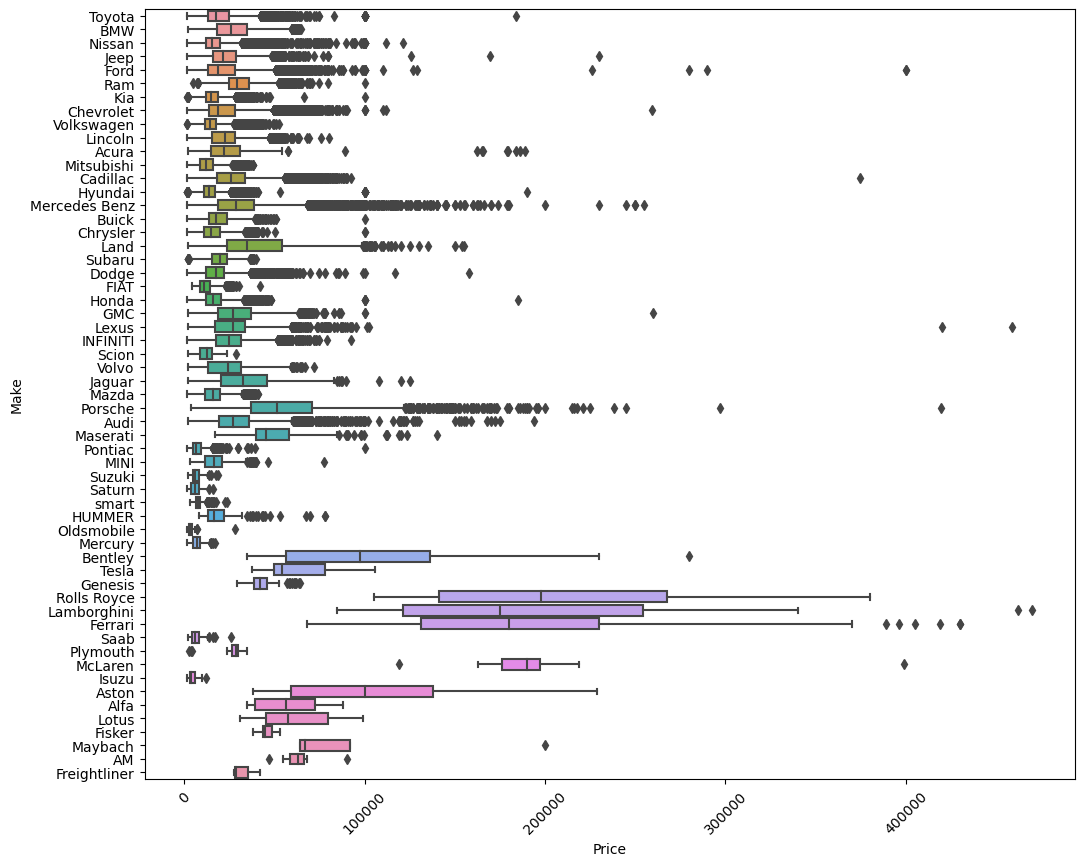

In [31]:
# Making boxplot to check outliers for price with its makers
plt.figure(figsize=(12, 10))
sns.boxplot(x='Price', y='Make', data=sampled_data)
# Rotate x-labels 
plt.xticks(rotation=45)
plt.show()

In [32]:
print(sampled_data[((sampled_data["Make"] == "Toyota") & (sampled_data["Price"] > 180000)) | 
                   ((sampled_data["Make"] == "Jeep") & (sampled_data["Price"] > 150000))| 
                   ((sampled_data["Make"] == "Ford") & (sampled_data["Price"] > 200000)) |
                   ((sampled_data["Make"] == "Chevrolet") & (sampled_data["Price"] > 200000)) |
                   ((sampled_data["Make"] == "Cadillac") & (sampled_data["Price"] > 350000))|
                   ((sampled_data["Make"] == "Chevrolet") & (sampled_data["Price"] > 200000)) |
                   ((sampled_data["Make"] == "Acura") & (sampled_data["Price"] > 150000))|
                   ((sampled_data["Make"] == "Hyundai") & (sampled_data["Price"] > 180000)) |
                   ((sampled_data["Make"] == "Mercedes Benz") & (sampled_data["Price"] > 200000))|
                   ((sampled_data["Make"] == "Dodge") & (sampled_data["Price"] > 150000))|
                   ((sampled_data["Make"] == "Honda") & (sampled_data["Price"] > 150000))|
                   ((sampled_data["Make"] == "GMC") & (sampled_data["Price"] > 150000))|
                   ((sampled_data["Make"] == "Lexus") & (sampled_data["Price"] > 350000))|
                   ((sampled_data["Make"] == "Porsche") & (sampled_data["Price"] > 270000))|
                   ((sampled_data["Make"] == "Bentley") & (sampled_data["Price"] > 260000))|
                   ((sampled_data["Make"] == "Rolls Royce") & (sampled_data["Price"] > 350000))|
                   ((sampled_data["Make"] == "Ferrari") & (sampled_data["Price"] > 350000))|
                   ((sampled_data["Make"] == "McLaren") & (sampled_data["Price"] > 350000))|
                   ((sampled_data["Make"] == "Lamborghini") & (sampled_data["Price"] > 350000))|
                   ((sampled_data["Make"] == "Maybach") & (sampled_data["Price"] > 150000))
                                                                                          ])


         Price  Year  Mileage              City State           Make  \
15843   279988  2017     1197            Naples    FL        Bentley   
25766   245000  2006     2781             Doral    FL  Mercedes Benz   
32881   259503  2017    26165       Burkburnett    TX      Chevrolet   
35505   369990  2017     1150          Hinsdale    IL        Ferrari   
43930   405000  2015     3436         Charlotte    NC        Ferrari   
62456   462000  2017      261             Davie    FL    Lamborghini   
65807   199888  2009    28592        Costa Mesa    CA        Maybach   
84594   259999  2016    22460           Milford    CT            GMC   
91890   369900  2017      855     NEWPORT BEACH    CA        Ferrari   
93261   379995  2014     4798            Dallas    TX    Rolls Royce   
93775   429900  2017      450   Fort Lauderdale    FL        Ferrari   
99998   229977  2017    17330      Harrisonburg    VA           Jeep   
101534  419000  2015     1795     NEWPORT BEACH    CA        Fer

# Removing Outliers

In [33]:
# Getting indices of rows that match the conditions
drop_outlier = sampled_data[((sampled_data["Make"] == "Toyota") & (sampled_data["Price"] > 180000)) | 
                    ((sampled_data["Make"] == "Jeep") & (sampled_data["Price"] > 150000))| 
                   ((sampled_data["Make"] == "Ford") & (sampled_data["Price"] > 200000)) |
                   ((sampled_data["Make"] == "Chevrolet") & (sampled_data["Price"] > 200000)) |
                   ((sampled_data["Make"] == "Cadillac") & (sampled_data["Price"] > 350000))|
                   ((sampled_data["Make"] == "Chevrolet") & (sampled_data["Price"] > 200000)) |
                   ((sampled_data["Make"] == "Acura") & (sampled_data["Price"] > 150000))|
                   ((sampled_data["Make"] == "Hyundai") & (sampled_data["Price"] > 180000)) |
                   ((sampled_data["Make"] == "Mercedes Benz") & (sampled_data["Price"] > 200000))|
                   ((sampled_data["Make"] == "Dodge") & (sampled_data["Price"] > 150000))|
                   ((sampled_data["Make"] == "Honda") & (sampled_data["Price"] > 150000))|
                   ((sampled_data["Make"] == "GMC") & (sampled_data["Price"] > 150000))|
                   ((sampled_data["Make"] == "Lexus") & (sampled_data["Price"] > 350000))|
                   ((sampled_data["Make"] == "Porsche") & (sampled_data["Price"] > 270000))|
                   ((sampled_data["Make"] == "Bentley") & (sampled_data["Price"] > 260000))|
                   ((sampled_data["Make"] == "Rolls Royce") & (sampled_data["Price"] > 350000))|
                   ((sampled_data["Make"] == "Ferrari") & (sampled_data["Price"] > 350000))|
                   ((sampled_data["Make"] == "Lamborghini") & (sampled_data["Price"] > 350000))|
                   ((sampled_data["Make"] == "McLaren") & (sampled_data["Price"] > 350000))|
                   ((sampled_data["Make"] == "Maybach") & (sampled_data["Price"] > 150000))].index

# Dropping the rows with the indices
sampled_data = sampled_data.drop(drop_outlier)


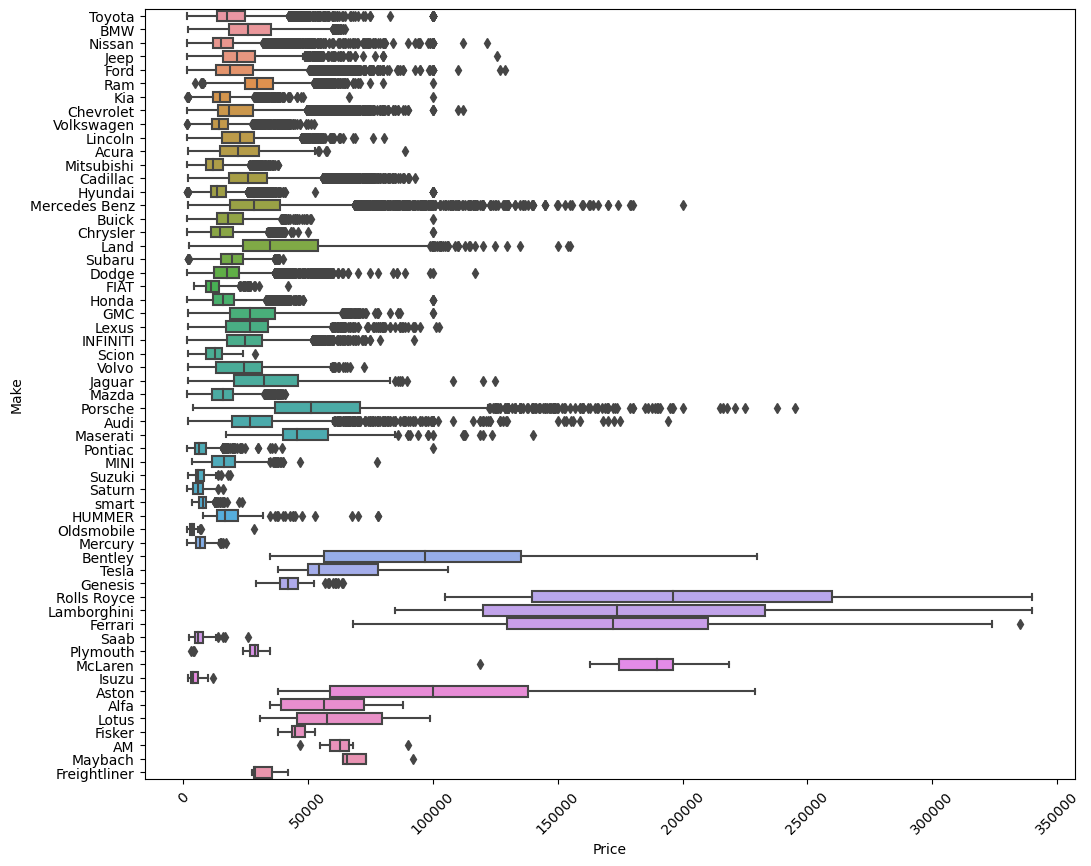

In [34]:
#Making a boxplot to check the outliers again
plt.figure(figsize=(12, 10))
sns.boxplot(x='Price', y='Make', data=sampled_data)
# Rotate x-labels
plt.xticks(rotation=45)
plt.show()

In [35]:
sampled_data.describe()

,Price,Year,Mileage
count,340798.000000,340798.000000,3.407980e+05
mean,21437.316539,2013.285480,5.253650e+04
std,13140.107234,3.415537,4.218506e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13005.250000,2012.000000,2.384100e+04
50%,18500.000000,2014.000000,4.028200e+04
75%,26995.000000,2016.000000,7.236800e+04
max,339999.000000,2018.000000,2.856196e+06


# Feature Selection

In [36]:
sampled_data.corr()

,Price,Year,Mileage
Price,1.000000,0.414231,-0.430214
Year,0.414231,1.000000,-0.760845
Mileage,-0.430214,-0.760845,1.000000


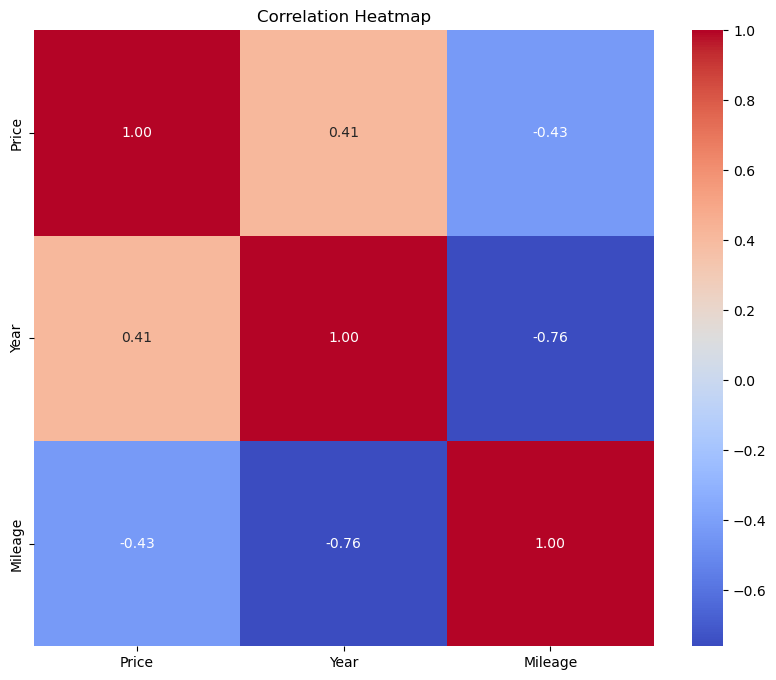

In [37]:
# Making a Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sampled_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Correlation with Price:
Price      1.000000
Year       0.414231
Mileage   -0.430214
Name: Price, dtype: float64


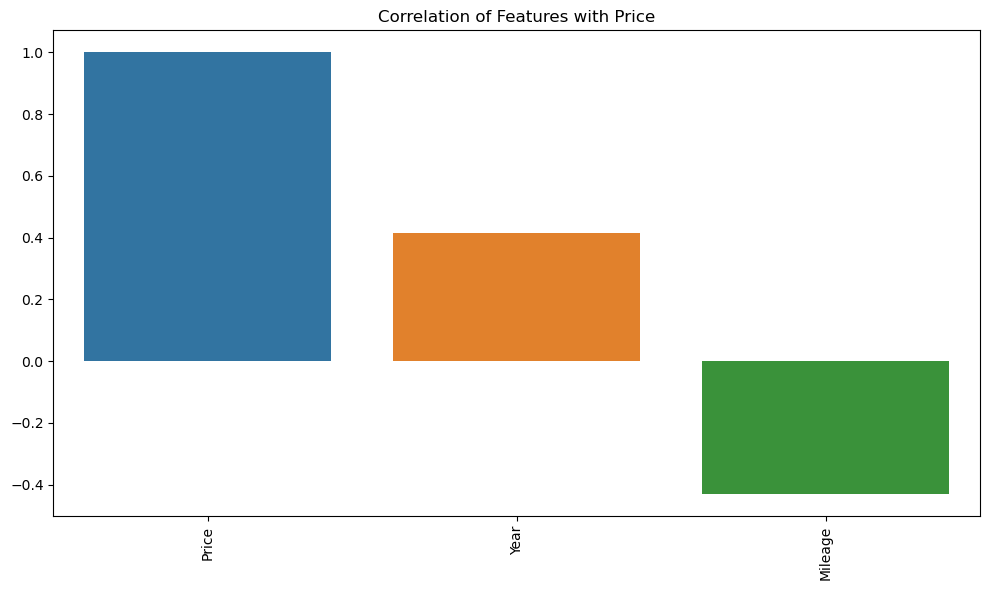

In [38]:
# Calculate correlations between Price and features 
correlation_with_price = sampled_data.corr()['Price'].sort_values(ascending=False)
# Display correlation values
print("Correlation with Price:")
print(correlation_with_price)

# Making a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values)
plt.xticks(rotation=90)
plt.title("Correlation of Features with Price")
plt.tight_layout()
plt.show()


# Visualization 

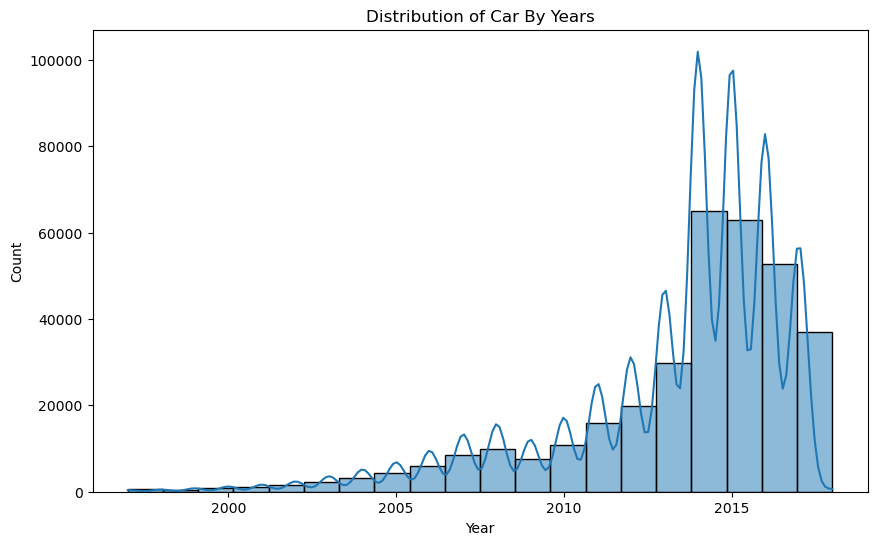

In [39]:
# Histrogram for Car by Years
plt.figure(figsize=(10, 6))

sns.histplot(data=sampled_data, x='Year', bins=20, kde=True)

plt.title('Distribution of Car By Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

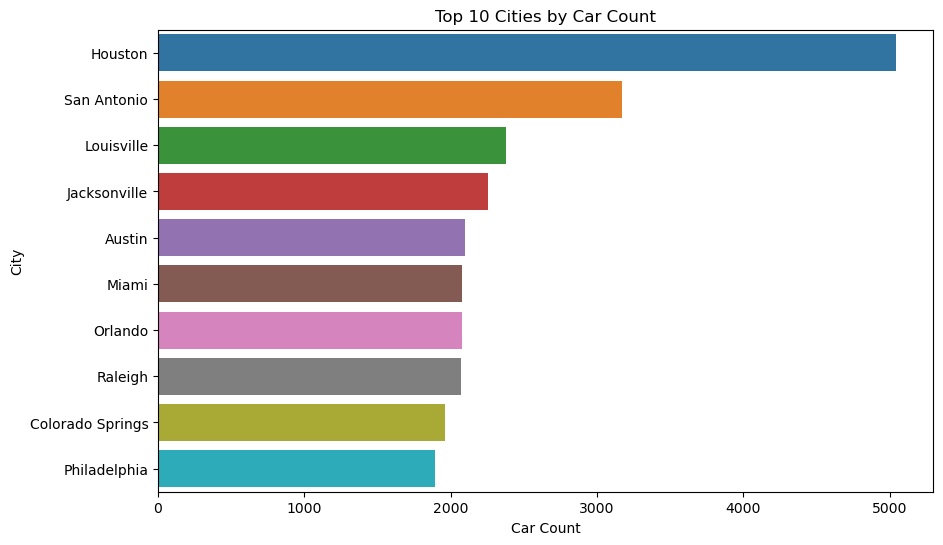

In [40]:
# Barplot of Top 10 Cities in term of car count
plt.figure(figsize=(10, 6))
top_cities = sampled_data['City'].value_counts().nlargest(10)

sns.barplot(x=top_cities, y=top_cities.index)

plt.title('Top 10 Cities by Car Count')
plt.xlabel('Car Count')
plt.ylabel('City')
plt.show()

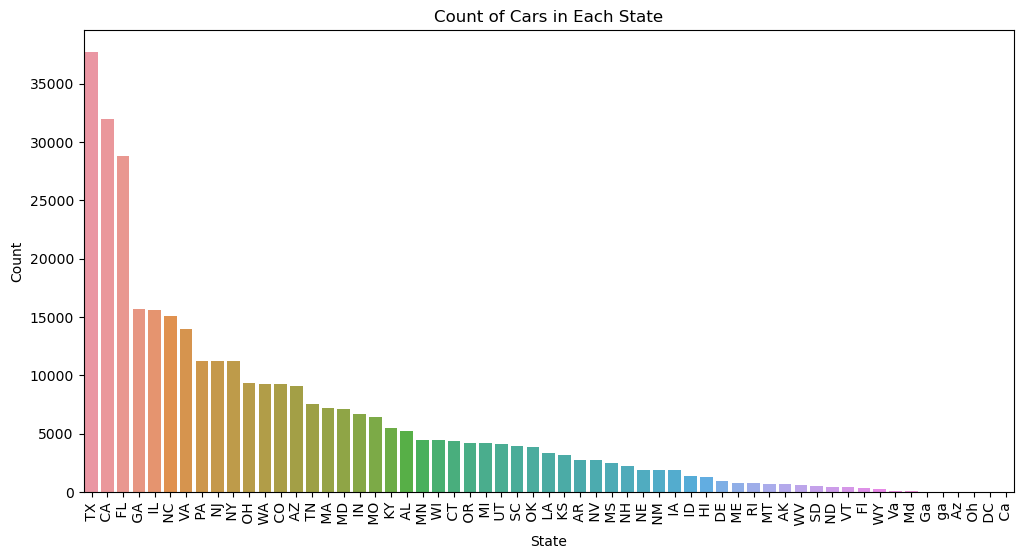

In [41]:
# Car Count by State
plt.figure(figsize=(12, 6))

state_counts = sampled_data['State'].value_counts()
sns.barplot(x=state_counts.index, y=state_counts.values)

plt.title('Count of Cars in Each State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

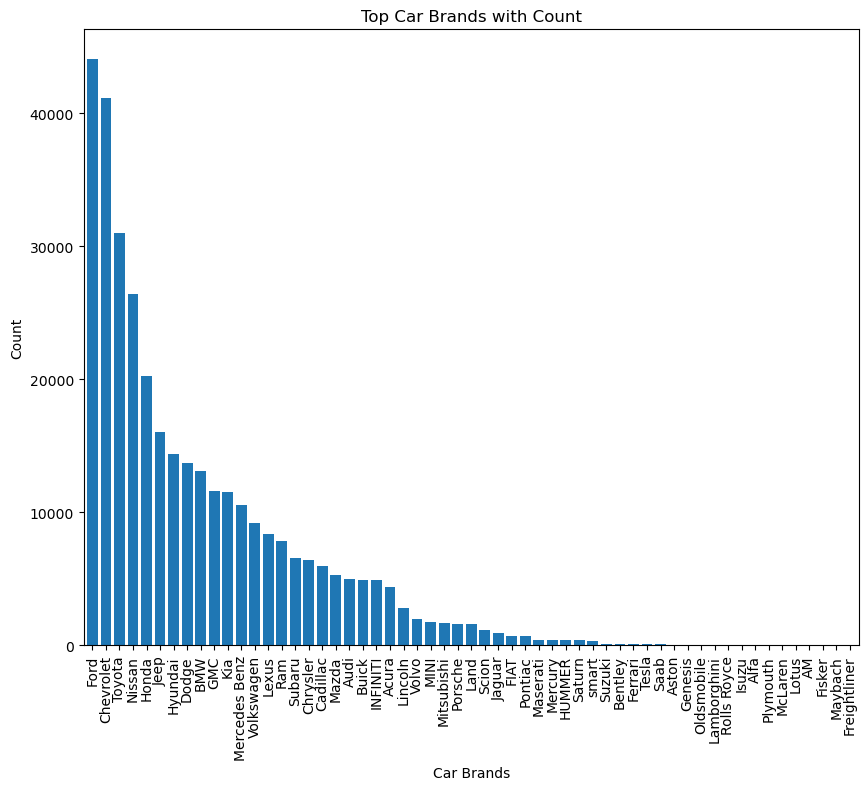

In [42]:
# Top Car Brands
plt.figure(figsize=(34, 8))
plt.subplot(1, 3, 1)
plt_1 = sampled_data.Make.value_counts().plot(kind='bar', width=0.8)
plt.title('Top Car Brands with Count')
plt_1.set(xlabel='Car Brands', ylabel='Count')
plt.show()

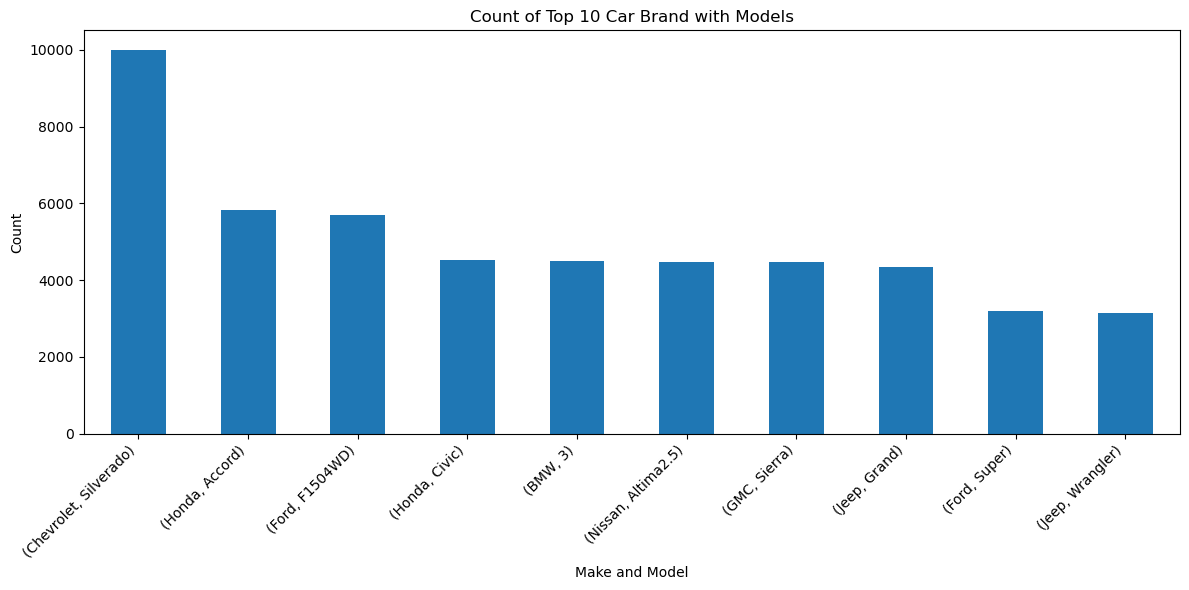

In [43]:
# Popular Top 10 Car Model
plt.figure(figsize=(12, 6))

top_models = sampled_data.groupby(['Make', 'Model']).size().nlargest(10)
top_models.plot(kind='bar')

plt.title('Count of Top 10 Car Brand with Models')
plt.xlabel('Make and Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

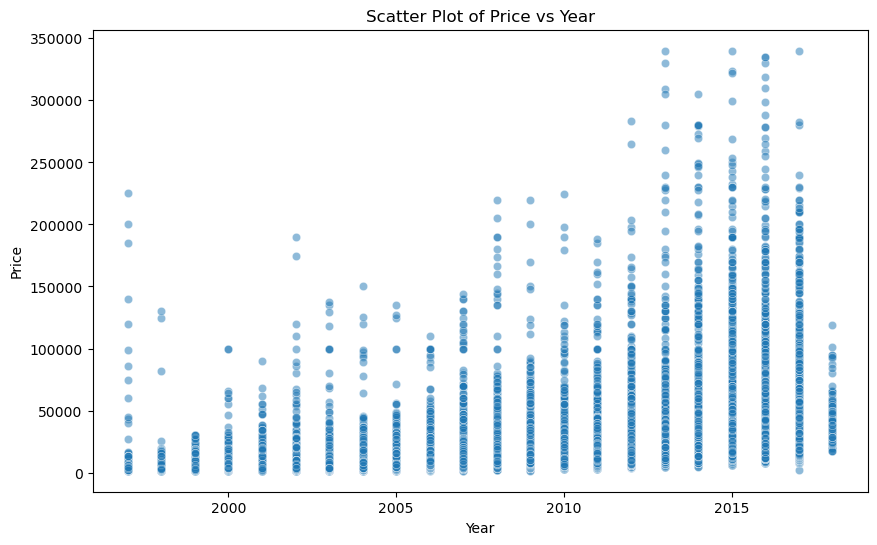

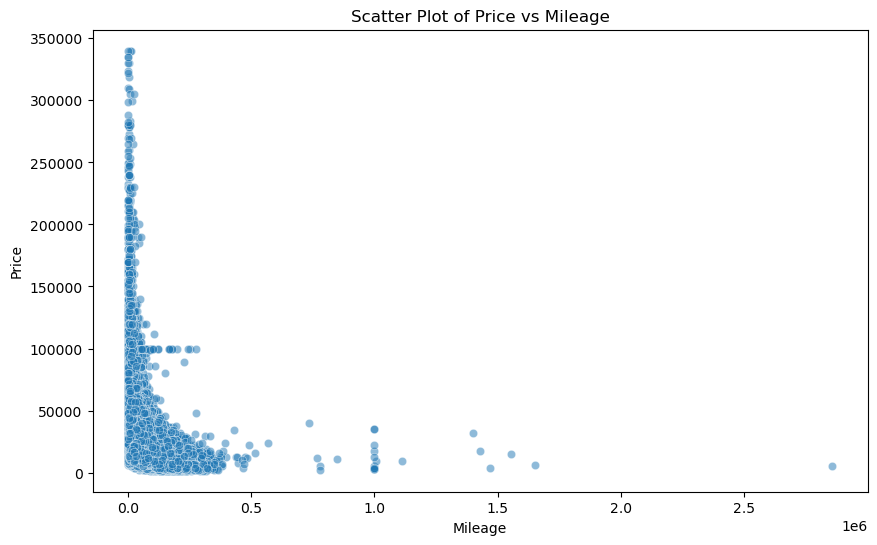

In [44]:
# Price vs Year and Price vs Mileage
numeric_columns = ['Year', 'Mileage']

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sampled_data, x=column, y='Price', alpha=0.5)
    plt.title(f'Scatter Plot of Price vs {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

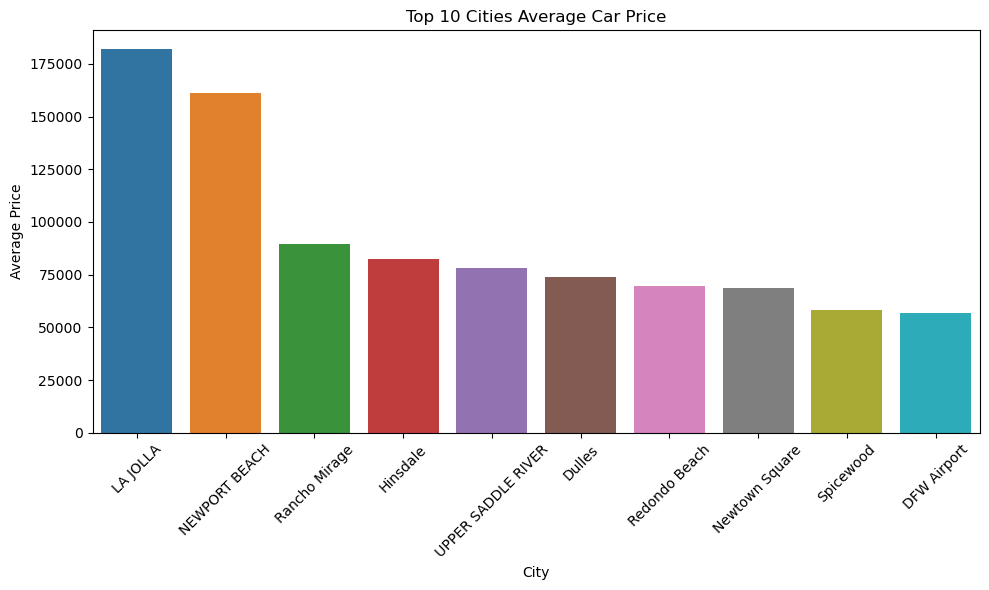

In [45]:
# Average Price in Top 10 Cities
plt.figure(figsize=(10, 6))

top_10_cities = sampled_data.groupby('City')['Price'].mean().nlargest(10)

sns.barplot(x=top_10_cities.index, y=top_10_cities.values)
plt.title('Top 10 Cities Average Car Price')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

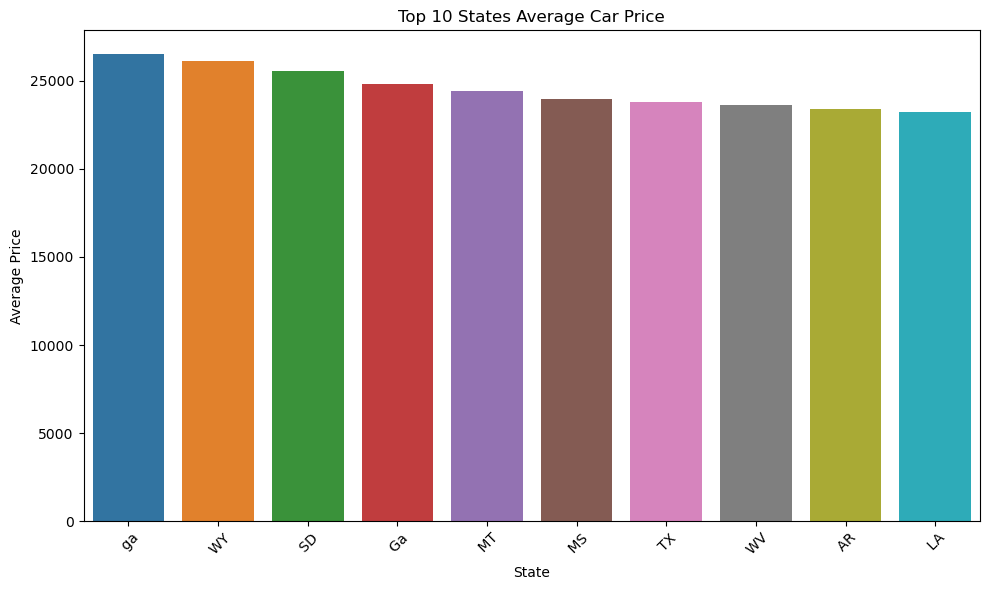

In [46]:
# Average Price in Top 10 State
plt.figure(figsize=(10, 6))

top_10_states = sampled_data.groupby('State')['Price'].mean().nlargest(10)

sns.barplot(x=top_10_states.index, y=top_10_states.values)
plt.title('Top 10 States Average Car Price')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()


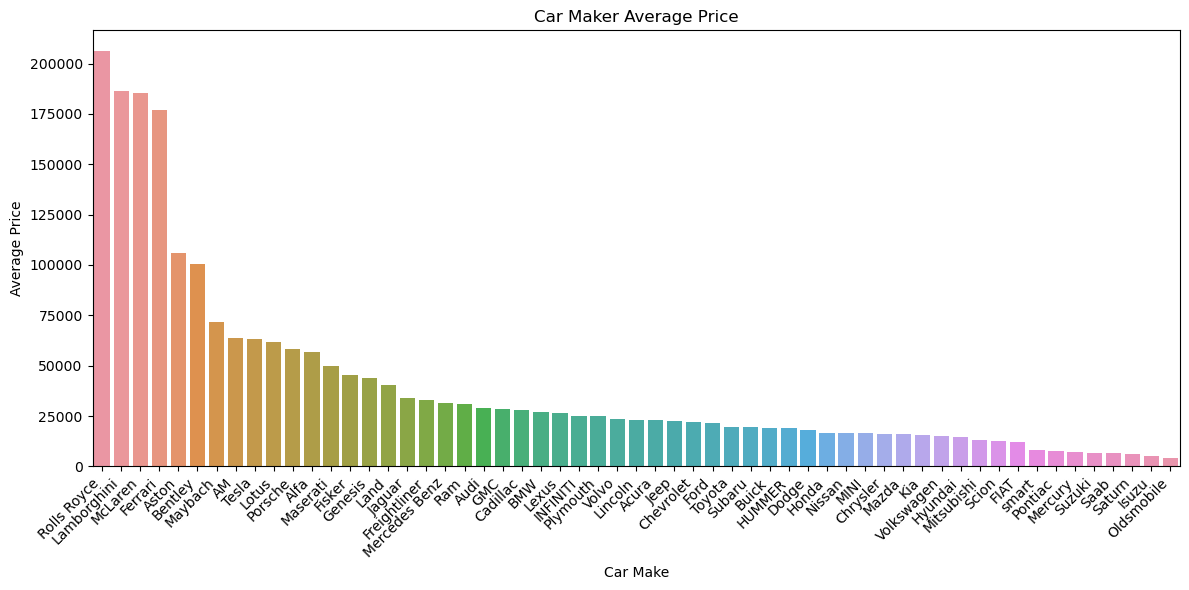

In [47]:
# Average Price of Car Maker
plt.figure(figsize=(12, 6))

average_prices_by_make = sampled_data.groupby('Make')['Price'].mean()
average_prices_by_make_sorted = average_prices_by_make.sort_values(ascending=False)

sns.barplot(x=average_prices_by_make_sorted.index, y=average_prices_by_make_sorted.values)
plt.title('Car Maker Average Price')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Car Make')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

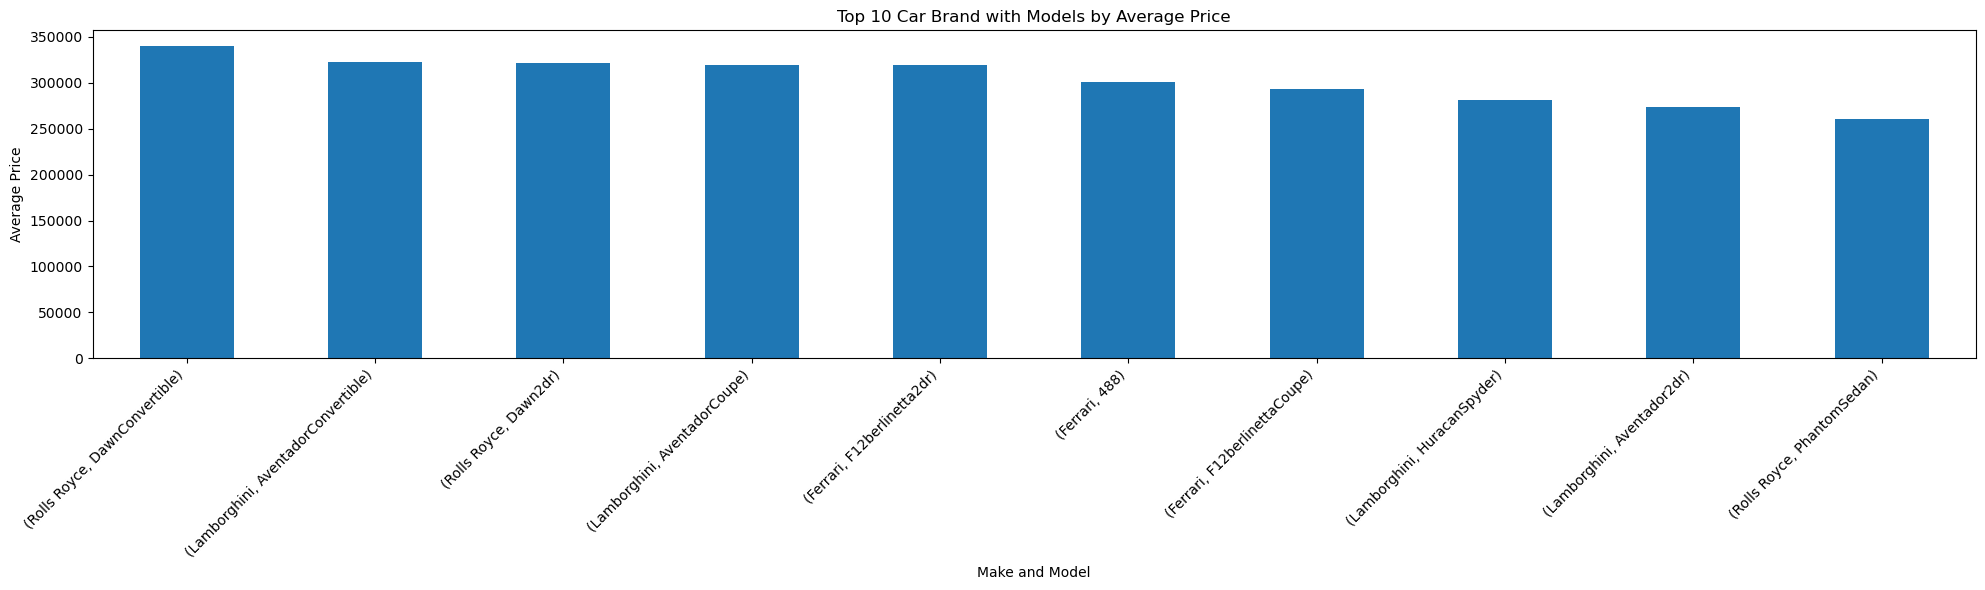

In [48]:
# Average Price of Top 10 Car Brands with Models
plt.figure(figsize=(20, 6))

top_models_price = sampled_data.groupby(['Make', 'Model'])['Price'].mean().nlargest(10)
top_models_price.plot(kind='bar')

plt.title('Top 10 Car Brand with Models by Average Price')
plt.xlabel('Make and Model')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

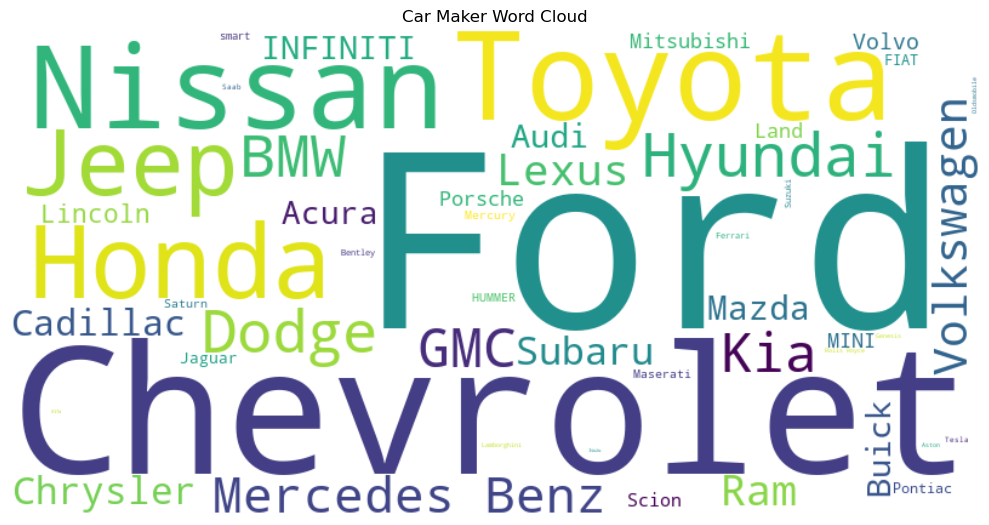

In [49]:
np.random.seed(42)

# Making a word cloud of car makers
car_manufacturers = ' '.join(sampled_data['Make'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(car_manufacturers)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Car Maker Word Cloud')
plt.axis('off')
plt.tight_layout()
plt.show()


# Model

In [50]:
#Dropping State and City
sampled_data = sampled_data.drop(columns=["City", "State"])
sampled_data

,Price,Year,Mileage,Make,Model
0,35986,2017,5770,Toyota,Tacoma4WD
1,21250,2011,48475,BMW,3
2,9995,2010,88970,Nissan,RogueAWD
3,30698,2014,42885,Jeep,Grand
4,13265,2016,28379,Ford,FusionSE
...,...,...,...,...,...
340844,19987,2014,108470,Jeep,Grand
340845,8499,2004,67895,Cadillac,SRX4dr
340846,12000,2013,80230,Jeep,PatriotLatitude
340847,13651,2014,32433,Volkswagen,Passat4dr


In [51]:
#Exporting Clean Car Dataset 
sampled_data.to_csv('Cleaned Dataset.csv')

# Data Splitting

In [52]:
#Splitting the data into features and target
X=sampled_data.drop(columns='Price')
y=sampled_data['Price']

In [53]:
#Splitting testing and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# One Hot Encoder

In [54]:
#Peforming OneHotEncoder on Make and Model Features
ohe=OneHotEncoder()
ohe.fit(X[['Make', 'Model']])

OneHotEncoder()

In [55]:
#Display categories in a list of arrays
ohe.categories_

[array(['AM', 'Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Buick',
        'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ferrari',
        'Fisker', 'Ford', 'Freightliner', 'GMC', 'Genesis', 'HUMMER',
        'Honda', 'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
        'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'MINI',
        'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes Benz',
        'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth',
        'Pontiac', 'Porsche', 'Ram', 'Rolls Royce', 'Saab', 'Saturn',
        'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo', 'smart'], dtype=object),
 array(['1', '124', '15002WD', ..., 'xD5dr', 'xDAutomatic', 'xDManual'],
       dtype=object)]

In [56]:
#Transforming Columns and Performing Normalization
trans_col = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_), ['Make', 'Model']),
    (StandardScaler(), ['Year', 'Mileage']),
    remainder='passthrough'
)

# Linear Regression

In [57]:
# Making a Linear Regression model 
LinReg = LinearRegression()

# Making a pipeline with column transformations and Linear Regression
pipe_lr=make_pipeline(trans_col,LinReg)

# Fitting the pipe on the training data
pipe_lr.fit(X_train, y_train)

# Making predictions on the test set
y_pred=pipe_lr.predict(X_test)

# Calculating R2-Score
r2_lr = r2_score(y_test, y_pred)
print("Linear Regression R2-Score:", r2_lr)

# Calculate Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse_lr)

# Calculate Root Mean Squared Error (RMSE)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression Root Mean Squared Error:", rmse_lr)

# Calculate Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred)
print("Linear Regression Mean Absolute Error:", mae_lr)

Linear Regression R2-Score: 0.8555361239579624
Linear Regression Mean Squared Error: 25316016.664753757
Linear Regression Root Mean Squared Error: 5031.502426189792
Linear Regression Mean Absolute Error: 2936.534294142009


In [58]:
# Making a Linear Regression model 
LinReg = LinearRegression()

# Making a pipeline with column transformations and Linear Regression
pipe_lr = make_pipeline(trans_col, LinReg)

# Setting the parameter for Randomized Search
param_dist = {
    'linearregression__fit_intercept': [True, False],
}

# Performing Randomized Search
random_search = RandomizedSearchCV(
    pipe_lr, param_distributions=param_dist, n_iter=2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)
# Fitting the random search on the training data
random_search.fit(X_train, y_train)

# Getting the Best Estimator from Random Search
pipe_lr_2 = random_search.best_estimator_

# Fitting the pipe on the training data
pipe_lr_2.fit(X_train, y_train)

# Making predictions on the test set
y_pred = pipe_lr_2.predict(X_test)

# Calculating R2-Score
r2_lr_tuned = r2_score(y_test, y_pred)
print("Linear Regression R2-Score(After tuning):", r2_lr_tuned)

# Calculating Mean Squared Error (MSE)
mse_lr_tuned  = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error(After tuning):", mse_lr_tuned)

# Calculating Root Mean Squared Error (RMSE)
rmse_lr_tuned  = np.sqrt(mse_lr_tuned)
print("Linear Regression Root Mean Squared Error(After tuning):", rmse_lr_tuned)

# Calculating Mean Absolute Error (MAE)
mae_lr_tuned  = mean_absolute_error(y_test, y_pred)
print("Linear Regression Mean Absolute Error(After tuning):", mae_lr_tuned)


Linear Regression R2-Score(After tuning): 0.8555361239579624
Linear Regression Mean Squared Error(After tuning): 25316016.664753757
Linear Regression Root Mean Squared Error(After tuning): 5031.502426189792
Linear Regression Mean Absolute Error(After tuning): 2936.534294142009


# Decision Tree

In [59]:
# Making a Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=1)

# Making a pipeline
dt_pipe = make_pipeline(trans_col, dt_reg)

# Fitting the pipe on the training data
dt_pipe.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = dt_pipe.predict(X_test)

# Calculating the R2-Score
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree R2-Score:", r2_dt)

# Calculating Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree Mean Squared Error:", mse_dt)

# Calculating Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)
print("Decision Tree Root Mean Squared Error:", rmse_dt)

# Calculating Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print("Decision Tree Mean Absolute Error:", mae_dt)

Decision Tree R2-Score: 0.8283539593607157
Decision Tree Mean Squared Error: 30079450.616420235
Decision Tree Root Mean Squared Error: 5484.47359519765
Decision Tree Mean Absolute Error: 3096.2992939407277


In [60]:
# Making a Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=1)

# Making a pipeline with column transformations and Decision Tree Regressor
pipe_dt = make_pipeline(trans_col, dt_reg)

# Setting the parameter for Randomized Search
param_dist = {
    'decisiontreeregressor__max_depth': [None, 10, 20, 30],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 2, 4],
}

# Performing Randomized Search
random_search_dt = RandomizedSearchCV(
    pipe_dt, param_distributions=param_dist, n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Fitting the random search on the training data
random_search_dt.fit(X_train, y_train)

# Getting the Best Estimator from Random Search
pipe_dt_2 = random_search_dt.best_estimator_

# Fitting the pipe on the training data
pipe_dt_2.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = pipe_dt_2.predict(X_test)

# Calculating R2-Score
r2_dt_tuned = r2_score(y_test, y_pred_dt)
print("Decision Tree R2-Score(After tuning):", r2_dt_tuned)

# Calculating Mean Squared Error (MSE)
mse_dt_tuned  = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree Mean Squared Error(After tuning):", mse_dt_tuned)

# Calculating Root Mean Squared Error (RMSE)
rmse_dt_tuned  = np.sqrt(mse_dt)
print("Decision Tree Root Mean Squared Error(After tuning):", rmse_dt_tuned)

# Calculating Mean Absolute Error (MAE)
mae_dt_tuned  = mean_absolute_error(y_test, y_pred_dt)
print("Decision Tree Mean Absolute Error(After tuning):", mae_dt_tuned)


Decision Tree R2-Score(After tuning): 0.8527924253528845
Decision Tree Mean Squared Error(After tuning): 25796825.58053423
Decision Tree Root Mean Squared Error(After tuning): 5484.47359519765
Decision Tree Mean Absolute Error(After tuning): 2855.451347610601


# XGBoost

In [106]:
# Making a XGBoost Regressor
xgb_reg = XGBRegressor(random_state=1)

# Making a pipeline with column transformations and XGBoost Regressor
xgb_pipe = make_pipeline(trans_col, xgb_reg)

# Fitting the pipe on the training data
xgb_pipe.fit(X_train, y_train)

# Making predictions on the test set
y_pred_xgb = xgb_pipe.predict(X_test)

# Calculating R2 Score
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost R2-Score:", r2_xgb)

# Calculating Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Mean Squared Error:", mse_xgb)

# Calculating  Root Mean Squared Error (RMSE)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBoost Root Mean Squared Error:", rmse_xgb)

# Calculating  Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("XGBoost Mean Absolute Error:", mae_xgb)

XGBoost R2-Score: 0.820267623408371
XGBoost Mean Squared Error: 31496509.478019543
XGBoost Root Mean Squared Error: 5612.175111132897
XGBoost Mean Absolute Error: 3795.347651733255


In [107]:
# Making a XGBoost Regressor
xgb_reg = XGBRegressor(random_state=1)

# Create a pipeline with column transformations and XGBoost Regressor
pipe_xgb = make_pipeline(trans_col, xgb_reg)

# Define a parameter distribution for Randomized Search with fewer options
param_dist = {
    'xgbregressor__n_estimators': [100, 200],
    'xgbregressor__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgbregressor__max_depth': [3, 4, 5, 6],
}

# Performing Randomized Search
random_search_xgb = RandomizedSearchCV(
    pipe_xgb, param_distributions=param_dist, n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Fitting the random search on the training data
random_search_xgb.fit(X_train, y_train)

# Getting the Best Estimator from Random Search
pipe_xgb_2 = random_search_xgb.best_estimator_

# Fitting the pipe on the training data
pipe_xgb_2.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = pipe_xgb_2.predict(X_test)

# Calculating R-squared score
r2_xgb_tuned  = r2_score(y_test, y_pred_xgb)
print("XGBoost R2-Score(After tuning):", r2_xgb_tuned)

# Calculating  Mean Squared Error (MSE)
mse_xgb_tuned  = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Mean Squared Error(After tuning):", mse_xgb_tuned)

# Calculating  Root Mean Squared Error (RMSE)
rmse_xgb_tuned  = np.sqrt(mse_xgb)
print("XGBoost Root Mean Squared Error(After tuning):", rmse_xgb_tuned)

# Calculating  Mean Absolute Error (MAE)
mae_xgb_tuned  = mean_absolute_error(y_test, y_pred_xgb)
print("XGBoost Mean Absolute Error(After tuning):", mae_xgb_tuned)


XGBoost R2-Score(After tuning): 0.7972489515349227
XGBoost Mean Squared Error(After tuning): 35530328.15099455
XGBoost Root Mean Squared Error(After tuning): 5612.175111132897
XGBoost Mean Absolute Error(After tuning): 4091.967605683949


# Random Forest

In [108]:
# Making a Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=1,n_jobs=-1)

# Making a pipeline for Random Forest Regressor
rf_pipe = make_pipeline(trans_col, rf_reg)

# Fitting the pipe on the training data
rf_pipe.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_pipe.predict(X_test)

# Calculating R2-Score
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R2-Score:", r2_rf)

# Calculating Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)

# Calculating Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest Root Mean Squared Error:", rmse_rf)

# Calculating Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest Mean Absolute Error:", mae_rf)

Random Forest R2-Score: 0.8777885609153567
Random Forest Mean Squared Error: 21416473.88437834
Random Forest Root Mean Squared Error: 4627.793630271162
Random Forest Mean Absolute Error: 2614.1741986756315


In [109]:
# Making a Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=1)

# Making a pipeline with column transformations and Random Forest Regressor
pipe_rf = make_pipeline(trans_col, rf_reg)

# Setting the parameter for Randomized Search
param_dist = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4],
}

# Performing Randomized Search
random_search_rf = RandomizedSearchCV(
    pipe_rf, param_distributions=param_dist, n_iter=3, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Fitting the random search on the training data
random_search_rf.fit(X_train, y_train)

# Getting the Best Estimator from Random Search
pipe_rf_2 = random_search_rf.best_estimator_

# Fitting the pipe on the training data
pipe_rf_2.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = pipe_rf_2.predict(X_test)

# Calculating R-squared score
r2_rf_tuned = r2_score(y_test, y_pred_rf)
print("Random Forest R2-Score (After tuning):", r2_rf_tuned)

# Calculating  Mean Squared Error (MSE)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error (After tuning):", mse_rf_tuned)

# Calculating  Root Mean Squared Error (RMSE)
rmse_rf_tuned = np.sqrt(mse_rf)
print("Random Forest Root Mean Squared Error (After tuning):", rmse_rf_tuned)

# Calculating  Mean Absolute Error (MAE)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest Mean Absolute Error (After tuning):", mae_rf_tuned)

Random Forest R2-Score (After tuning): 0.8717857598753611
Random Forest Mean Squared Error (After tuning): 22468411.678983208
Random Forest Root Mean Squared Error (After tuning): 4627.793630271162
Random Forest Mean Absolute Error (After tuning): 2634.892568240707


# Comparision

In [112]:
# Storing the evaluation metrics for every model in a dictionary
results = {
    "Model": ["Linear Regression", "Linear Regression (Tuned)", 
              "Decision Tree", "Decision Tree (Tuned)", 
              "XGBoost", "XGBoost (Tuned)", 
              "Random Forest", "Random Forest (Tuned)"],
    
    "R2-Score": [r2_lr, r2_lr_tuned, r2_dt, r2_dt_tuned, r2_xgb, r2_xgb_tuned, r2_rf, r2_rf_tuned],
    "MSE": [mse_lr, mse_lr_tuned, mse_dt, mse_dt_tuned, mse_xgb, mse_xgb_tuned, mse_rf, mse_rf_tuned],
    "RMSE": [rmse_lr, rmse_lr_tuned, rmse_dt, rmse_dt_tuned, rmse_xgb, rmse_xgb_tuned, rmse_rf, rmse_rf_tuned],
    "MAE": [mae_lr, mae_lr_tuned, mae_dt, mae_dt_tuned, mae_xgb, mae_xgb_tuned, mae_rf, mae_rf_tuned]
}

# Make a DataFrame from the dictionary
df_results = pd.DataFrame(results)

# Print the table
print(df_results)

                       Model  R2-Score           MSE         RMSE          MAE
0          Linear Regression  0.855536  2.531602e+07  5031.502426  2936.534294
1  Linear Regression (Tuned)  0.855536  2.531602e+07  5031.502426  2936.534294
2              Decision Tree  0.828354  3.007945e+07  5484.473595  3096.299294
3      Decision Tree (Tuned)  0.852792  2.579683e+07  5484.473595  2855.451348
4                    XGBoost  0.820268  3.149651e+07  5612.175111  3795.347652
5            XGBoost (Tuned)  0.797249  3.553033e+07  5612.175111  4091.967606
6              Random Forest  0.877789  2.141647e+07  4627.793630  2614.174199
7      Random Forest (Tuned)  0.871786  2.246841e+07  4627.793630  2634.892568


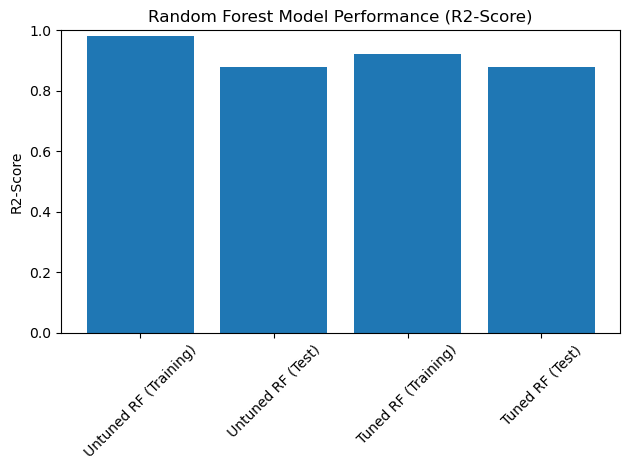

In [111]:
# Using the untuned model to predict on training data
y_pred_train_untuned_rf = rf_pipe.predict(X_train)
r2_train_untuned_rf = r2_score(y_train, y_pred_train_untuned_rf)

# Using the tuned model to predict on training data
y_pred_train_tuned_rf = pipe_rf_2.predict(X_train)
r2_train_tuned_rf = r2_score(y_train, y_pred_train_tuned_rf)

# Prepare data for the bar graph
labels_rf = ['Untuned RF (Training)', 'Untuned RF (Test)', 'Tuned RF (Training)', 'Tuned RF (Test)']
r2_scores_rf = [r2_train_untuned_rf, r2_rf, r2_train_tuned_rf, r2_rf] 

# Plotting
plt.bar(labels_rf, r2_scores_rf)
plt.ylabel('R2-Score')
plt.title('Random Forest Model Performance (R2-Score)')
plt.xticks(rotation=45)
plt.ylim(0, 1)  
plt.tight_layout()
plt.show()


# File Export

In [113]:
pickle.dump(pipe_rf_2,open('random_forest_model.pkl','wb'))

In [114]:
pipe_rf_2.predict(pd.DataFrame([['2017','5770','Toyota','Tacoma4WD']], columns=['Year','Mileage','Make','Model']))

array([35680.02165298])